In [1]:
import numpy as np
from numpy import fft
import matplotlib.pylab as plt

from blusky.wavelets.morlet2d import Morlet2D
from blusky.wavelets.wavelet_factories_2d import vanilla_morlet_2d

# Demo wavelet factories
Use the factory functions to produce sets of Morlet2D wavelets at different resolutions, and also generate Morlet2D wavelets with the definitions used in https://github.com/scatnet/scatnet.

In [2]:
def do_vis(wavelet, sample_rate=0.004):
    """
    Visualize the wavelet an it's spectrum.
    
    Parameters
    ----------
    wav - Array
        The wavelet.
    """    
    f1 = fft.fftshift(np.fft.fftn(wavelet))
    f2 = fft.fftshift(np.fft.fft(wavelet[wavelet.shape[0]//2,:]))
       
    freqz = fft.fftshift(np.fft.fftfreq(wavelet.shape[0], sample_rate))    
    
    fig, axs = plt.subplots(2,2,figsize=(20,10))   
    axs[0,0].imshow(wavelet.real)
    axs[0,0].set_title('Real Part')
    
    axs[0,1].imshow(wavelet.imag)
    axs[0,1].set_title('Imag Part')
    
    axs[1,0].imshow(np.abs(f1.T), extent=(freqz.min(), freqz.max(), freqz.min(), freqz.max()))
    axs[1,0].set_title('Fourier (Power)')
    
    axs[1,1].plot(freqz, np.abs(f2))
    axs[1,1].set_title('Fourier Cross-Section (Power)')
    
    plt.show()


# Filter bank
Construct three wavelets with different resolutions. "j" is the "scale" used in the continuous wavelet transform.
As "j" increases, the center frequency shifts towards zero and the bandwidth shrinks. 

In [31]:
wav0 = vanilla_morlet_2d(0.001, j=0, crop=5.).kernel(0)
wav1 = vanilla_morlet_2d(0.001, j=1, crop=4.).kernel(0)
wav2 = vanilla_morlet_2d(0.001, j=2, crop=3.).kernel(0)

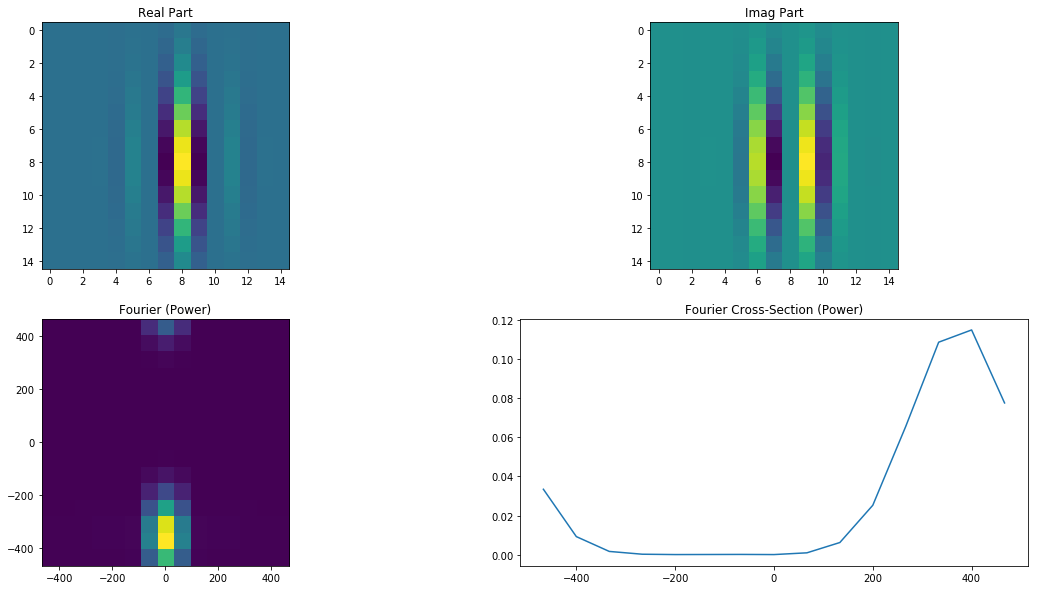

In [32]:
do_vis(wav0, sample_rate=0.001)

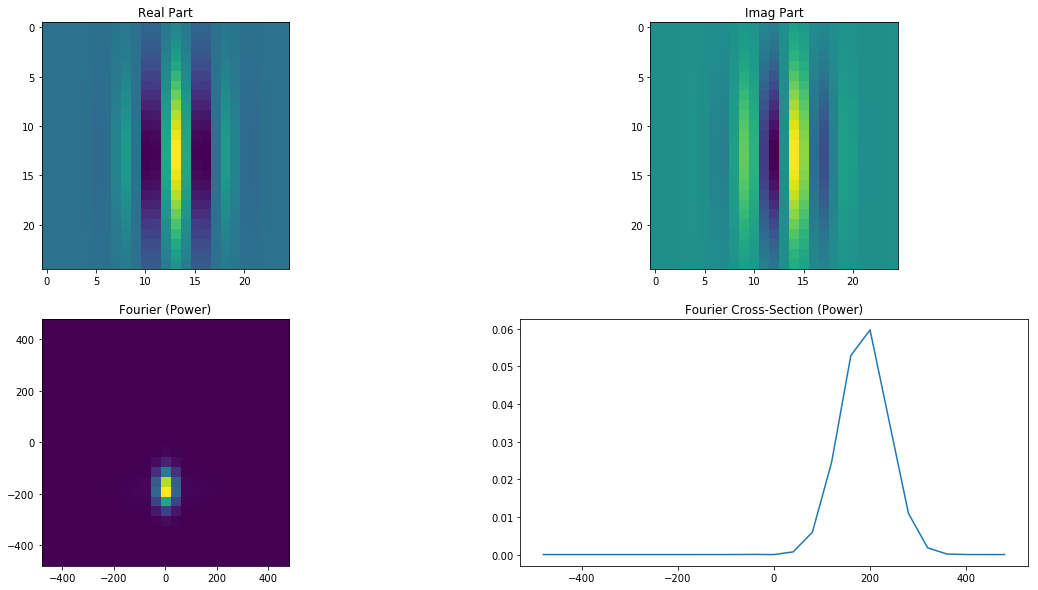

In [33]:
do_vis(wav1, sample_rate=0.001)

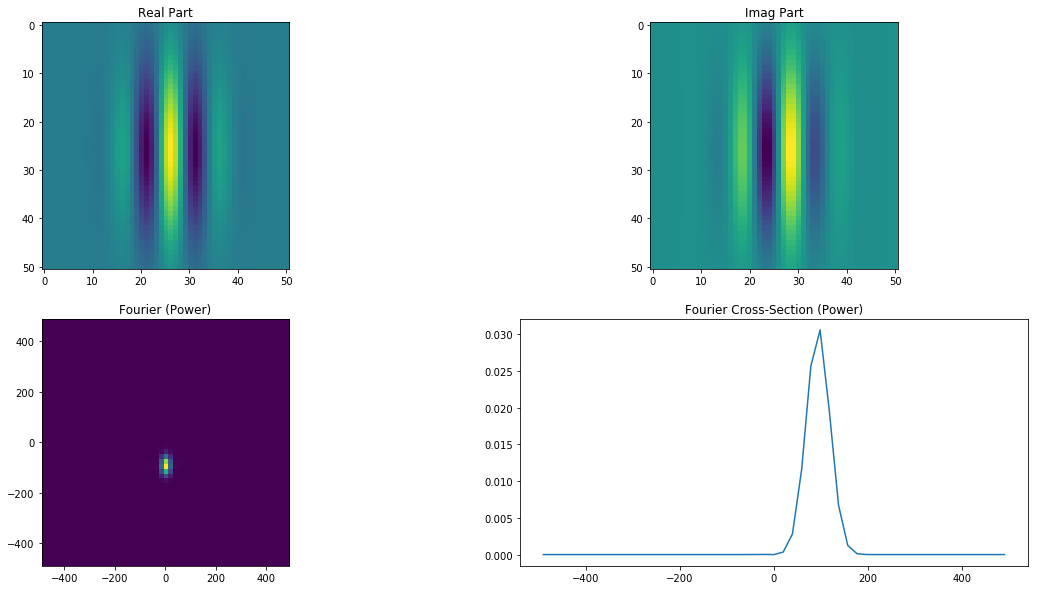

In [30]:
do_vis(wav2, sample_rate=0.001)